# STAGE 2 --- Training and Running the Model --- 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import numpy as np

In [3]:
# Load dataset
df = pd.read_csv(r"D:\Coding\Machibe_learning\Project_01\Include\Soil-Fertilty-Prediction-Project\Data\Soil_data.csv")

# Features and target
X = df.drop("fertility", axis=1)
y = df["fertility"]

In [15]:
print("Data Shape: ", X.shape)

Data Shape:  (1288, 12)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [5]:
print("Train Data Shape: ", X_train.shape)

Train Data Shape:  (1030, 12)


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1030 entries, 220 to 1022
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       1030 non-null   int64  
 1   P       1030 non-null   float64
 2   K       1030 non-null   int64  
 3   ph      1030 non-null   float64
 4   ec      1030 non-null   float64
 5   oc      1030 non-null   float64
 6   S       1030 non-null   float64
 7   zn      1030 non-null   float64
 8   fe      1030 non-null   float64
 9   cu      1030 non-null   float64
 10  Mn      1030 non-null   float64
 11  B       1030 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 104.6 KB


# Ploting Function
# ----------------------

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix_sklearn(y_true, y_pred, class_names, model_name="Model", figsize=(18, 7), cmap=plt.cm.Blues):
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(f"Confusion Matrices for {model_name}", fontsize=16)

    # Raw counts
    ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred,
        display_labels=class_names,
        cmap=cmap,
        values_format='d',
        ax=axes[0]
    )
    axes[0].set_title('Confusion Matrix (Raw Counts)')

    # Normalized
    ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred,
        display_labels=class_names,
        cmap=cmap,
        normalize='true',
        values_format='.2f',
        ax=axes[1]
    )
    axes[1].set_title('Normalized Confusion Matrix (Row-wise)')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [8]:
from sklearn.metrics import classification_report

def evaluate_model(y_true, y_pred, model_name="Model", class_names=["Class A", "Class B", "Class C"]):
    print(f"\n=== Classification Report for {model_name} ===\n")
    print(classification_report(y_true, y_pred, target_names=class_names))
    
    plot_confusion_matrix_sklearn(
        y_true,
        y_pred,
        class_names=class_names,
        model_name=model_name
    )


# Create Model

In [9]:
# Train and Predict
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

xgb = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

svm = SVC(kernel='rbf', class_weight='balanced')
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)

ab = AdaBoostClassifier(n_estimators=100)
ab.fit(X_train, y_train)
ab_preds = ab.predict(X_test)


# Evaluation


=== Classification Report for Random Forest ===

              precision    recall  f1-score   support

     Class A       0.94      0.93      0.93        80
     Class B       0.93      0.88      0.90        88
     Class C       0.94      1.00      0.97        90

    accuracy                           0.93       258
   macro avg       0.93      0.93      0.93       258
weighted avg       0.93      0.93      0.93       258



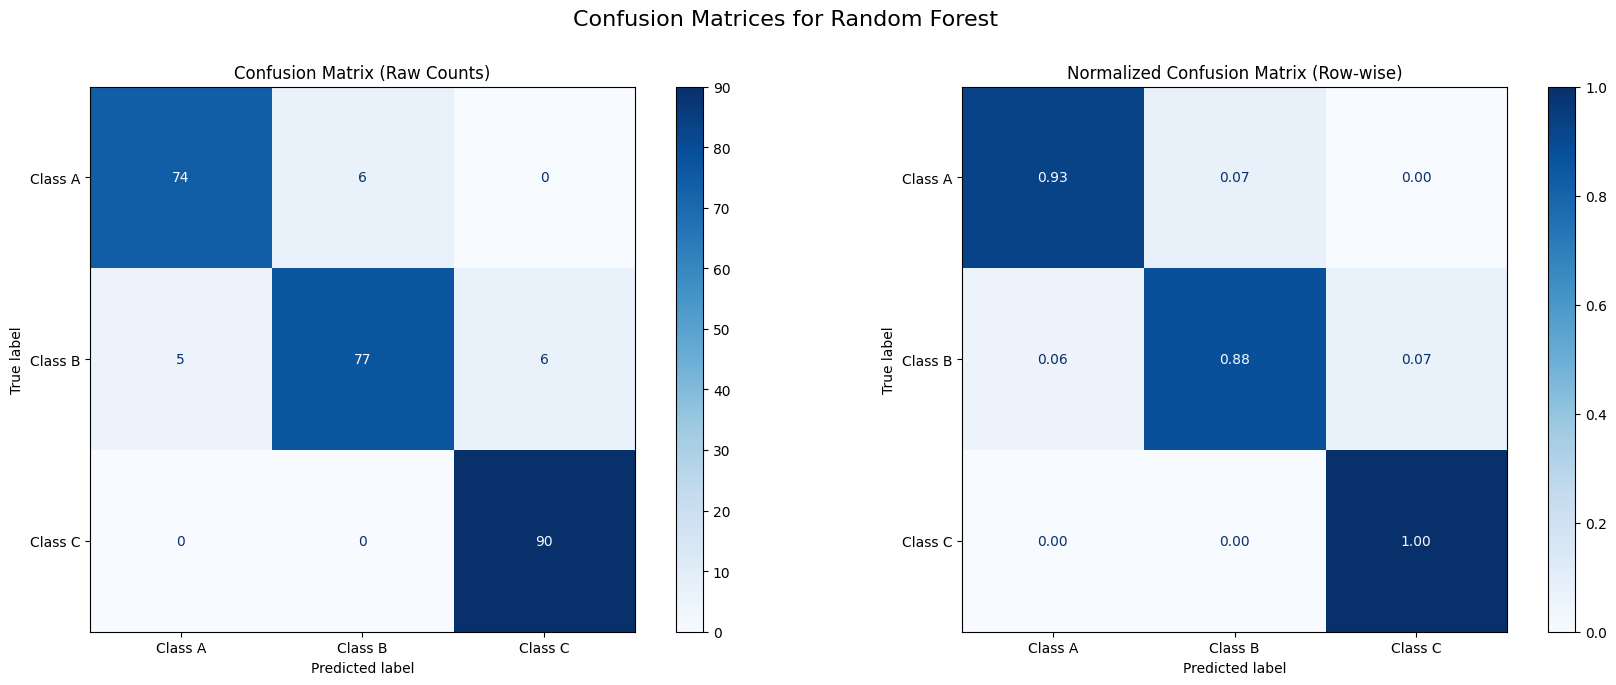

In [10]:
evaluate_model(y_test, 
    rf_preds, 
    model_name="Random Forest"
)



=== Classification Report for XGBoost ===

              precision    recall  f1-score   support

     Class A       0.94      0.95      0.94        80
     Class B       0.95      0.86      0.90        88
     Class C       0.93      1.00      0.96        90

    accuracy                           0.94       258
   macro avg       0.94      0.94      0.94       258
weighted avg       0.94      0.94      0.94       258



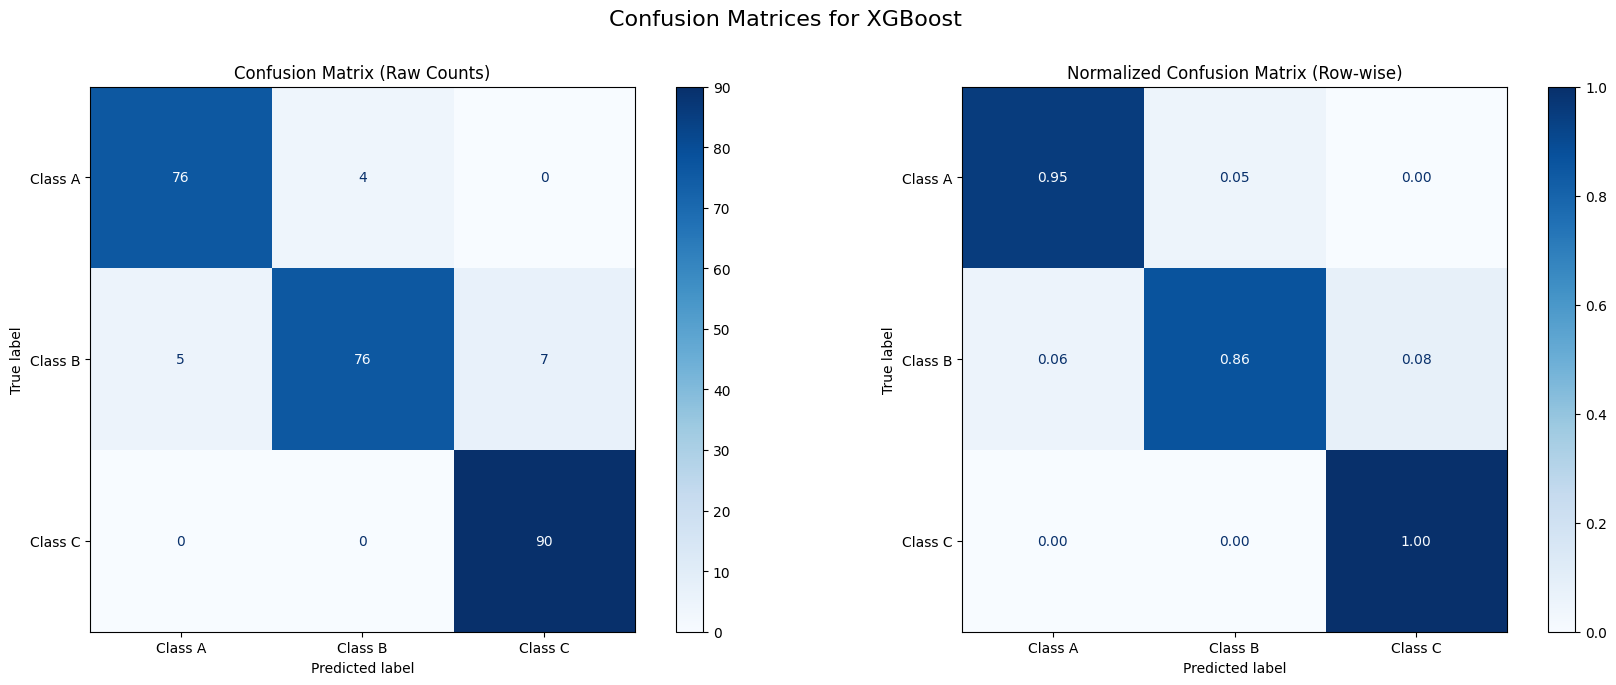

In [11]:
evaluate_model(y_test, 
    xgb_preds, 
    model_name="XGBoost"
)


=== Classification Report for SVM ===

              precision    recall  f1-score   support

     Class A       0.88      0.82      0.85        80
     Class B       0.71      0.61      0.66        88
     Class C       0.72      0.86      0.78        90

    accuracy                           0.76       258
   macro avg       0.77      0.76      0.76       258
weighted avg       0.77      0.76      0.76       258



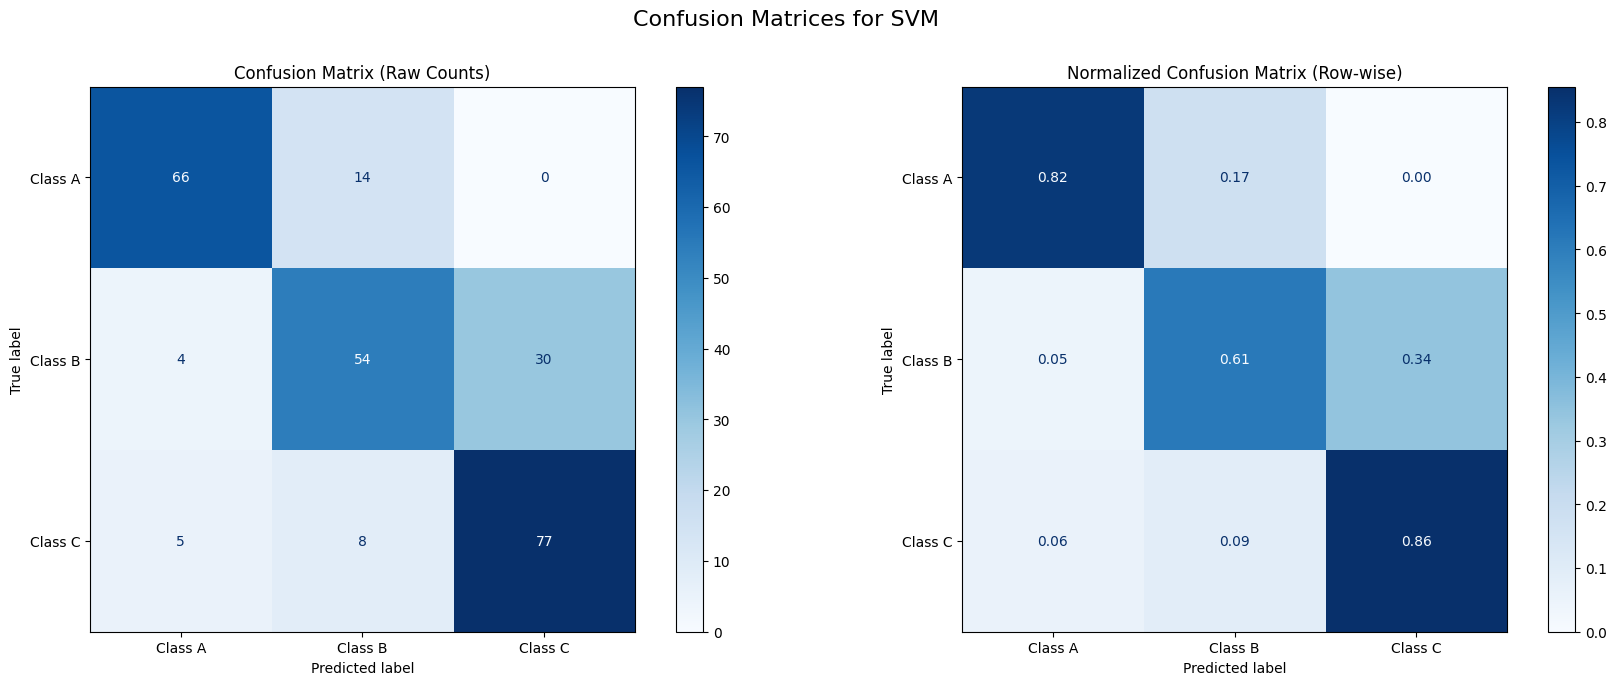

In [12]:
evaluate_model(y_test, 
    svm_preds, 
    model_name="SVM"
)


=== Classification Report for AdaBoost ===

              precision    recall  f1-score   support

     Class A       0.94      0.90      0.92        80
     Class B       0.76      0.82      0.79        88
     Class C       0.87      0.83      0.85        90

    accuracy                           0.85       258
   macro avg       0.86      0.85      0.85       258
weighted avg       0.85      0.85      0.85       258



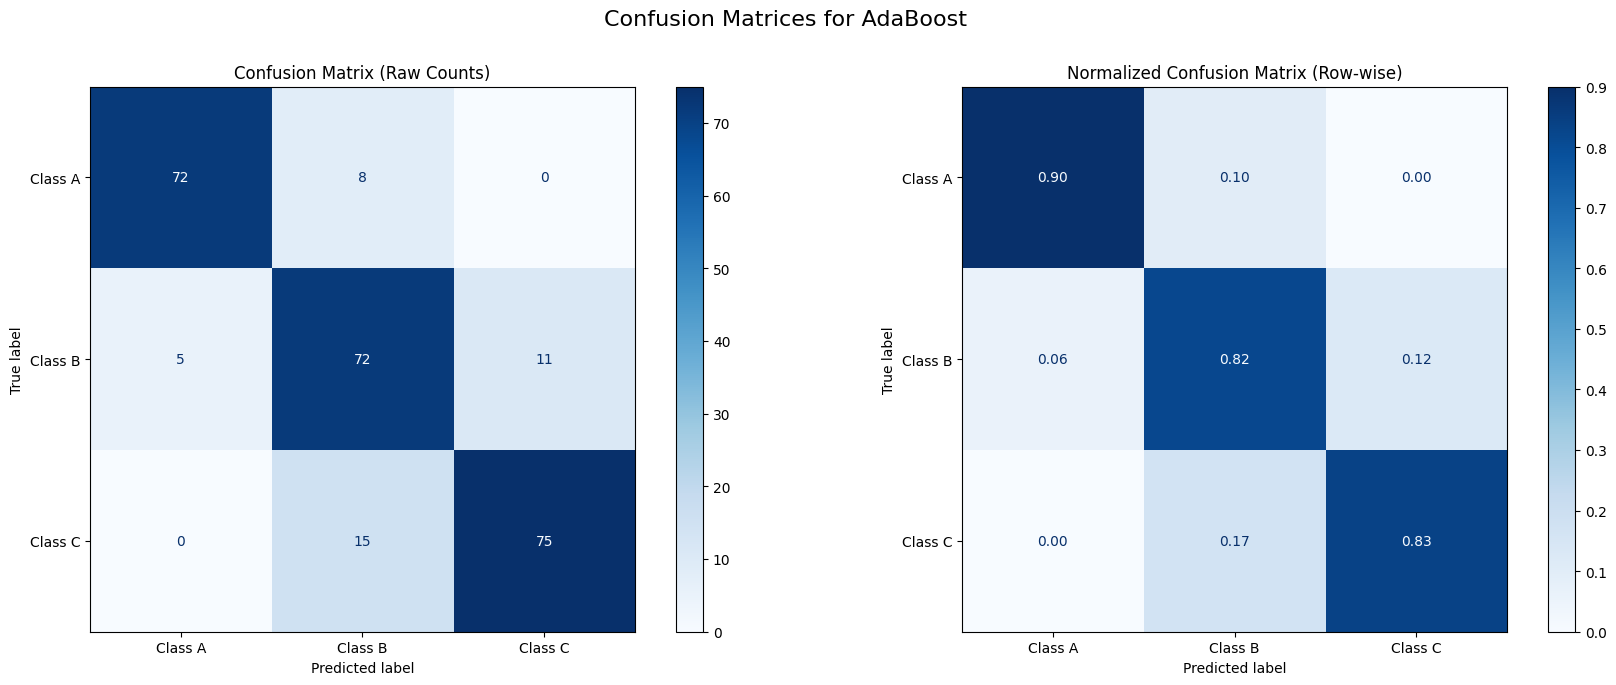

In [13]:
evaluate_model(y_test, 
    ab_preds, 
    model_name="AdaBoost"
)

# Save all training and test data in the form of CSVs to be used in the next notebook - 'Hyperparameter Tuning'

In [14]:
# Save training features and labels
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)

# Save test features and labels
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)
